Importing necessary packages 

In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier ,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve ,auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import eli5
from eli5.sklearn import PermutationImportance
import shap
from pdpbox import pdp, info_plots
np.random.seed(123)
pd.options.mode.chained_assignment = None 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


Feature Engineering : 


In [21]:
data = pd.read_csv('../input/heart.csv')
data.head()
#Change column names to better ones
data.columns = ['age' , 'sex' , 'chest_pain_type', 'resting_bp' , 'cholestrol' , 'fasting_sugar', 'rest_ecg' , 'max_heartrate', 'angina' , 'depression', 'st_slope' , 'num_major_vessels' , 'thalassemia' , 'target']

Changing values fo categorical variables :

In [22]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 1] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 4] = 'asymptomatic'

data['fasting_sugar'][data['fasting_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_sugar'][data['fasting_sugar'] == 1] = 'greater than 120mg/ml'

data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

data['angina'][data['angina'] == 0] = 'no'
data['angina'][data['angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 1] = 'upsloping'
data['st_slope'][data['st_slope'] == 2] = 'flat'
data['st_slope'][data['st_slope'] == 3] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'normal'
data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

data.dtypes

age                    int64
sex                   object
chest_pain_type       object
resting_bp             int64
cholestrol             int64
fasting_sugar         object
rest_ecg              object
max_heartrate          int64
angina                object
depression           float64
st_slope              object
num_major_vessels      int64
thalassemia           object
target                 int64
dtype: object

Changing data types for categorical variables to objeect :

In [23]:
data['sex'] = data['sex'].astype('object')
data['chest_pain_type'] = data['chest_pain_type'].astype('object')
data['fasting_sugar'] = data['fasting_sugar'].astype('object')
data['rest_ecg'] = data['rest_ecg'].astype('object')
data['angina'] = data['angina'].astype('object')
data['st_slope'] = data['st_slope'].astype('object')
data['thalassemia'] = data['thalassemia'].astype('object')
data.dtypes


age                    int64
sex                   object
chest_pain_type       object
resting_bp             int64
cholestrol             int64
fasting_sugar         object
rest_ecg              object
max_heartrate          int64
angina                object
depression           float64
st_slope              object
num_major_vessels      int64
thalassemia           object
target                 int64
dtype: object

In [24]:
data = pd.get_dummies(data , drop_first = True)
data.head()


,age,resting_bp,cholestrol,max_heartrate,depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0


array([1, 0])

The Model :

In [44]:
x_train , x_test , y_train , y_test = train_test_split (data.drop('target', 1) , data['target'] ,test_size = .2 , random_state = 10)


In [45]:
model = RandomForestClassifier(max_depth =5)
model.fit(x_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
y_predict = model.predict(x_test)
#y_predict
y_pred_quant = model.predict_proba(x_test)[:,1]
#y_pred_quant
y_pred_bin  = model.predict(x_test)

Assess the model fit using confusion matrix :

In [52]:
cm = confusion_matrix(y_test , y_pred_bin)
cm

array([[29,  6],
       [ 5, 21]])

Calculate sensitivity and specificity as metrics :

In [53]:
sensi = cm[0,0]/(cm[0,0]+cm[1,0])
speci = cm[1,1]/(cm[1,1]+cm[0,1])
print("Sensitivity = " ,sensi)
print("Specificity =" , speci)


Sensitivity =  0.8529411764705882
Specificity = 0.7777777777777778


Text(0.5, 1.0, 'ROC Curve for Classifier')

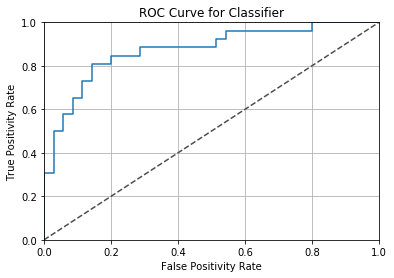

In [59]:
fpr, tpr,  thresholds = roc_curve(y_test , y_pred_quant)

fig , ax = plt.subplots()
ax.plot(fpr,tpr)
ax.plot([0,1] , [0,1] , transform= ax.transAxes , ls="--" , c=".3")
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.0])
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.grid(True)
plt.title('ROC Curve for Classifier')

AUC ( Area Under the Curve ) is another metric , with a value of >0.80 indicating a good model fit.

In [60]:
auc(fpr,tpr)

0.8736263736263736

Visualizations :

In [62]:
perm = PermutationImportance(model , random_state =1).fit(x_test ,y_test)
eli5.show_weights(perm ,feature_names = x_test.columns.tolist())

Weight,Feature
0.0623 ± 0.0482,thalassemia_fixed defect
0.0230 ± 0.0161,chest_pain_type_atypical angina
0.0230 ± 0.0161,depression
0.0197 ± 0.0482,num_major_vessels
0.0098 ± 0.0161,max_heartrate
0.0066 ± 0.0334,chest_pain_type_typical angina
0.0066 ± 0.0334,sex_male
0.0066 ± 0.0262,age
0.0066 ± 0.0161,st_slope_flat
0.0033 ± 0.0131,fasting_sugar_lower than 120mg/ml


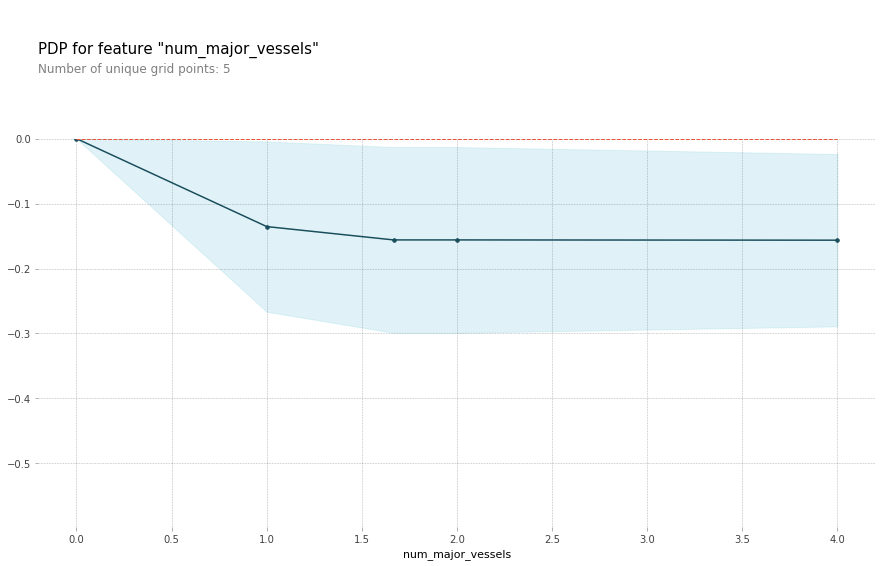

In [66]:
base_features = data.columns.values.tolist()
base_features.remove('target')

fname = 'num_major_vessels'
pdp_dist = pdp.pdp_isolate(model=model ,dataset = x_test , model_features = base_features , feature = fname)
pdp.pdp_plot(pdp_dist , fname)
plt.show()


We can see as the number of major blood vessels increase , the probability of heart disease reduces. 

Let's see for age:

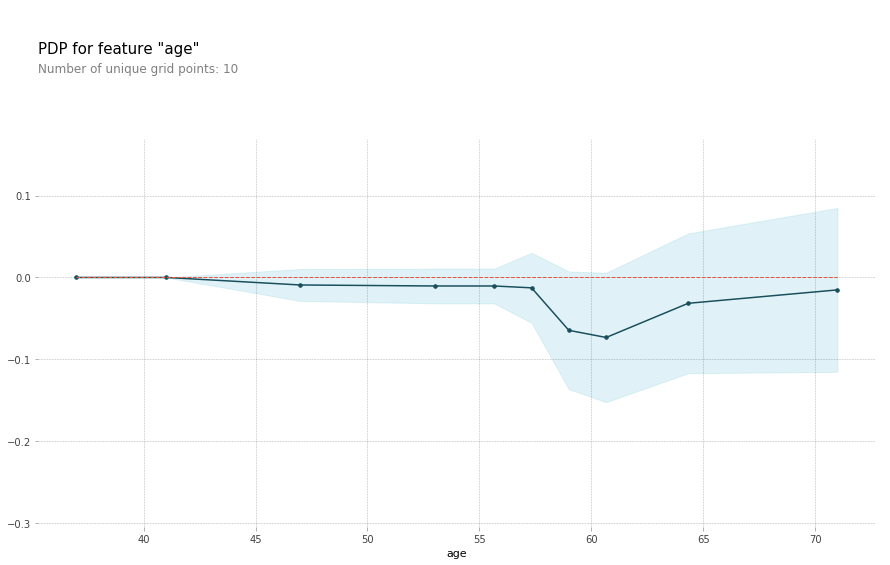

In [68]:
fname = 'age'
pdp_age = pdp.pdp_isolate(model = model ,dataset = x_test,model_features = base_features , feature = fname)
pdp.pdp_plot(pdp_age,fname)
plt.show()

The plot is quite weird , with no sensible possible interpretation as it indicates higher age , and low chance of heart disease. Thought the confidence region indicates this might not be true.

Let's check for ST depression :

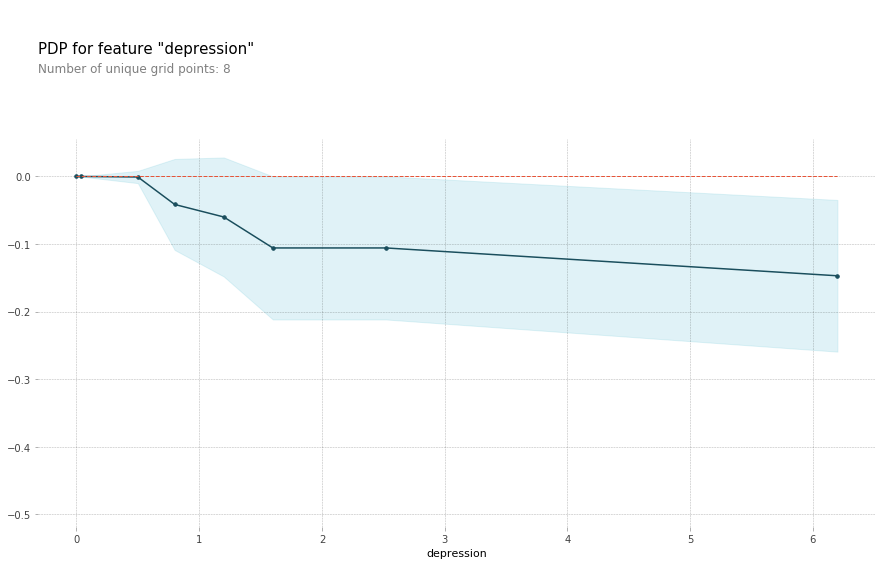

In [70]:
fname = 'depression'
pdp_dep = pdp.pdp_isolate(model = model , dataset = x_train , model_features = base_features , feature =  fname)
pdp.pdp_plot(pdp_dep , fname)
plt.show()

SHAP Values:

In [73]:
def riskfactors( model , patient):
    explainer = shap.TreeExplainer(model)
    values = explainer.shap_values(patient)
    shap.initjs
    return shap.force_plot(explainer.expected_value[1] , values[1] , patient)

In [76]:
shap.initjs()

In [77]:
pred_patient = x_test.iloc[1,:].astype(float)
riskfactors(model , pred_patient)